In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [72]:
dq = pd.read_csv("/content/drive/MyDrive/Review.csv")

In [73]:
df = dq

In [74]:
def remove_shortform_specialchar(text):
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        
        return text
        

In [75]:
import re
def remove_url(x):
    x = x.lower()
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    x = pattern.sub('', x)
    return x

In [76]:
from bs4 import BeautifulSoup
def remove_html(x):
  soup = BeautifulSoup(x,'lxml')
  return soup.get_text()

In [77]:
def remove_emoji(x):        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        x = emoji.sub(r'', x)
        return x

In [78]:
def remove_special_char(text):
  text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
  return text

In [79]:
def remove_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [80]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
exceptionStopWords = {
    'again',
    'against',
    'ain',
    'almost',
    'among',
    'amongst',
    'amount',
    'anyhow',
    'anyway',
    'aren',
    "aren't",
    'below',
    'bottom',
    'but',
    'cannot',
    'couldn',
    "couldn't",
    'didn',
    "didn't",
    'doesn',
    "doesn't",
    'don',
    "don't",
    'done',
    'down',
    'except',
    'few',
    'hadn',
    "hadn't",
    'hasn',
    "hasn't",
    'haven',
    "haven't",
    'however',
    'isn',
    "isn't",
    'least',
    'mightn',
    "mightn't",
    'must',
    'mustn',
    "mustn't",
    'needn',
    "needn't",
    'neither',
    'never',
    'nevertheless',
    'no',
    'nobody',
    'none',
    'noone',
    'nor',
    'not',
    'nothing',
    'should',
    "should've",
    'shouldn',
    "shouldn't",
    'too',
    'top',
    'up',
    'wasn',
    "wasn't",
    'well',
    'weren',
    "weren't",
    'won',
    "won't",
    'wouldn',
    "wouldn't",
}
finalstop = stop_words-exceptionStopWords

In [82]:
reviews = df['Review']
reviews

0         The incoming and outgoing flight was delayed...
1         Back in December my family and I as we were ...
2         As usual the flight is delayed this week, it...
3        A short BA euro trip and this is where BA exc...
4         We are flying Business class for most of our...
                              ...                        
3822    An interesting contrast on recent Gatwick to T...
3823    Heathrow Marrakech. Had previously travelled o...
3824    Flew LHR - VIE return operated by bmi but BA a...
3825    Flight from Heathrow to Toronto. Booked emerge...
3826    Business LHR to BKK. 747-400. First try back w...
Name: Review, Length: 3827, dtype: object

In [83]:
review_list = []
for review in reviews:
  review = remove_html(str(review))
  review = remove_url(review)
  review = str(review).lower()
  review = remove_special_char(str(review))
  review = remove_shortform_specialchar(review)
  review = remove_emoji(review)
  review = remove_square_brackets(review)
  review_list.append(review)

In [84]:
df['clean_text'] = pd.Series(review_list) 

In [85]:
df["Reviews_clean"]=df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in finalstop]))
df = df[['Review',"Reviews_clean"]]
df

,Review,Reviews_clean
0,The incoming and outgoing flight was delayed...,incoming outgoing flight delayed french air tr...
1,Back in December my family and I as we were ...,back december family getting onto plane refuse...
2,"As usual the flight is delayed this week, it...",usual flight delayed week already 3 hours i’m ...
3,A short BA euro trip and this is where BA exc...,short ba euro trip ba excel clean aircraft goo...
4,We are flying Business class for most of our...,flying business class flight premium economy b...
...,...,...
3822,An interesting contrast on recent Gatwick to T...,interesting contrast recent gatwick turin back...
3823,Heathrow Marrakech. Had previously travelled o...,heathrow marrakech previously travelled britis...
3824,Flew LHR - VIE return operated by bmi but BA a...,flew lhr vie return operated bmi but ba aircra...
3825,Flight from Heathrow to Toronto. Booked emerge...,flight heathrow toronto booked emergency exit ...


### This is a work of unsupervised sentiment analysis of NLP
 

In [86]:
import gensim
print(gensim.__version__)

3.6.0


In [87]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [88]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Reviews_clean'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Review,Reviews_clean,POS tagged
0,The incoming and outgoing flight was delayed...,incoming outgoing flight delayed french air tr...,"[(incoming, v), (outgoing, v), (flight, n), (d..."
1,Back in December my family and I as we were ...,back december family getting onto plane refuse...,"[(back, r), (december, a), (family, n), (getti..."
2,"As usual the flight is delayed this week, it...",usual flight delayed week already 3 hours i’m ...,"[(usual, a), (flight, n), (delayed, v), (week,..."
3,A short BA euro trip and this is where BA exc...,short ba euro trip ba excel clean aircraft goo...,"[(short, a), (ba, n), (euro, a), (trip, n), (b..."
4,We are flying Business class for most of our...,flying business class flight premium economy b...,"[(flying, v), (business, n), (class, n), (flig..."


In [89]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Review,Reviews_clean,POS tagged,Lemma
0,The incoming and outgoing flight was delayed...,incoming outgoing flight delayed french air tr...,"[(incoming, v), (outgoing, v), (flight, n), (d...",incoming outgo flight delay french air traff...
1,Back in December my family and I as we were ...,back december family getting onto plane refuse...,"[(back, r), (december, a), (family, n), (getti...",back december family get onto plane refuse e...
2,"As usual the flight is delayed this week, it...",usual flight delayed week already 3 hours i’m ...,"[(usual, a), (flight, n), (delayed, v), (week,...",usual flight delay week already 3 hour ’ hol...
3,A short BA euro trip and this is where BA exc...,short ba euro trip ba excel clean aircraft goo...,"[(short, a), (ba, n), (euro, a), (trip, n), (b...",short ba euro trip ba excel clean aircraft g...
4,We are flying Business class for most of our...,flying business class flight premium economy b...,"[(flying, v), (business, n), (class, n), (flig...",fly business class flight premium economy ba...


In [90]:
df[['Review','Lemma']]

,Review,Lemma
0,The incoming and outgoing flight was delayed...,incoming outgo flight delay french air traff...
1,Back in December my family and I as we were ...,back december family get onto plane refuse e...
2,"As usual the flight is delayed this week, it...",usual flight delay week already 3 hour ’ hol...
3,A short BA euro trip and this is where BA exc...,short ba euro trip ba excel clean aircraft g...
4,We are flying Business class for most of our...,fly business class flight premium economy ba...
...,...,...
3822,An interesting contrast on recent Gatwick to T...,interest contrast recent gatwick turin back ...
3823,Heathrow Marrakech. Had previously travelled o...,heathrow marrakech previously travel british...
3824,Flew LHR - VIE return operated by bmi but BA a...,flew lhr vie return operate bmi ba aircraft ...
3825,Flight from Heathrow to Toronto. Booked emerge...,flight heathrow toronto book emergency exit ...


### Sentiment analysis using VADER

In [91]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
# function to calculate vader sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Review,Reviews_clean,POS tagged,Lemma,Sentiment,Analysis
0,The incoming and outgoing flight was delayed...,incoming outgoing flight delayed french air tr...,"[(incoming, v), (outgoing, v), (flight, n), (d...",incoming outgo flight delay french air traff...,-0.9243,Negative
1,Back in December my family and I as we were ...,back december family getting onto plane refuse...,"[(back, r), (december, a), (family, n), (getti...",back december family get onto plane refuse e...,0.1994,Neutral
2,"As usual the flight is delayed this week, it...",usual flight delayed week already 3 hours i’m ...,"[(usual, a), (flight, n), (delayed, v), (week,...",usual flight delay week already 3 hour ’ hol...,0.0772,Neutral
3,A short BA euro trip and this is where BA exc...,short ba euro trip ba excel clean aircraft goo...,"[(short, a), (ba, n), (euro, a), (trip, n), (b...",short ba euro trip ba excel clean aircraft g...,0.9753,Positive
4,We are flying Business class for most of our...,flying business class flight premium economy b...,"[(flying, v), (business, n), (class, n), (flig...",fly business class flight premium economy ba...,-0.5113,Negative


In [93]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    2043
Negative    1053
Neutral      731
Name: Analysis, dtype: int64

### Pie chart showing the percentage of each of the sentiments in the sentiment analysis of the reviews 

<Axes: ylabel='Analysis'>

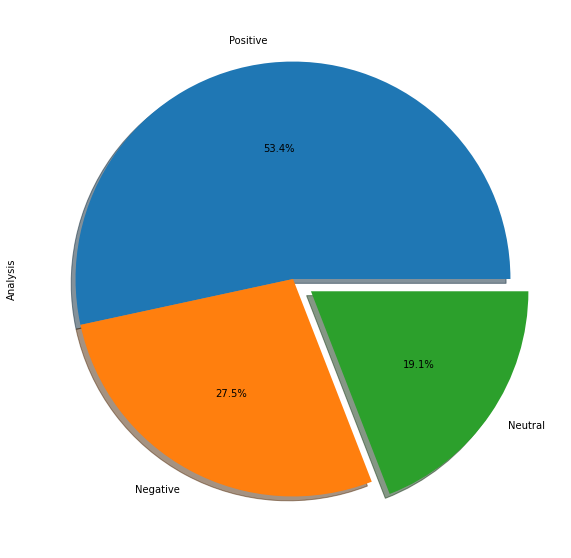

In [94]:
df['Analysis'].value_counts().plot.pie(shadow=True,legend = False,autopct='%1.1f%%', explode=(0, 0, 0.1),startangle = 0,figsize = (10,10))

## Word Cloud Showing most common words other than the stop words in the reviews 

In [95]:
pip install wordcloud

In [97]:
from wordcloud import WordCloud
import numpy as np 
import matplotlib.pyplot as plt
import PIL.Image

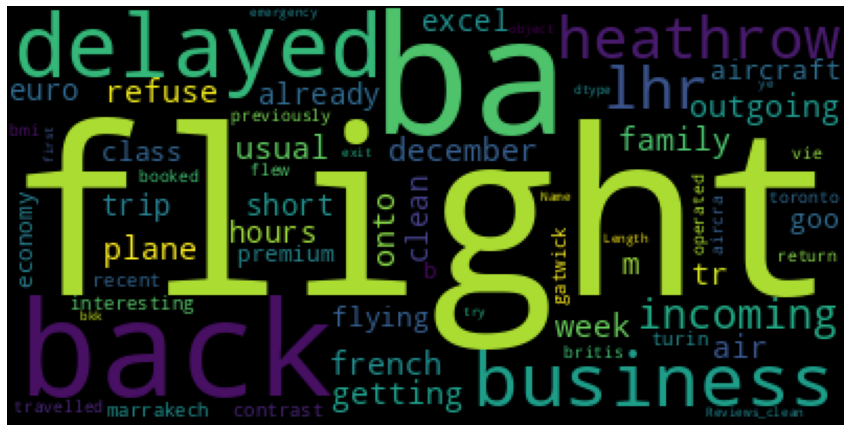

In [107]:
text = df['Reviews_clean']
fig = plt.figure(1, figsize=(15, 15))
wc = WordCloud(
    background_color="black"
).generate(str(text))
plt.imshow(wc)
plt.axis("off")
plt.show()